# Twitter sentiment analysis- Covid19

In [1]:
#pip install BeautifulSoup

In [2]:
#pip install lxml

### Data Import and first view

In [110]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import matplotlib.pyplot as plt
from afinn import Afinn

tweets_data_path = 'covidabc' #set this to your filename
tweets_data = []
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        if 'created_at' in line:
             tweet = json.loads(line)
             if 'retweeted_status' in tweet:
                  tweets_data.append(tweet)
    except:
        continue


tweets = pd.DataFrame()
#ADD columns to dataframe
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
#tweets['screen name'] = list(map(lambda tweet: tweet['screen name'], tweets_data))
#tweets['source'] = list(map(lambda tweet: tweet['source'], tweets_data))
#tweets['hashtags'] = list(map(lambda tweet: tweet['hashtags'], tweets_data))

#tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] is not None else None, tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['user']['location'] if tweet['user'] is not None else None, tweets_data))

#tweets['favorite_count'] = list(map(lambda tweet: int(tweet['retweeted_status']['favorite_count']), tweets_data))
#tweets['retweet_count'] = list(map(lambda tweet: int(tweet['retweeted_status']['retweet_count']), tweets_data))


afinn = Afinn(emoticons=True)
tweets['sentiment'] = list(map(lambda tweet: afinn.score(tweet['text']), tweets_data ))

#tweets['created'] = list(map(lambda tweet: tweet['created_at'], tweets_data))

tweets_en = tweets[(tweets.lang == "en") & (tweets.country == "USA")].drop(columns=['lang']).dropna().reset_index()
#tweets_en = tweets_en.dropna()
tweets_en2 = tweets[(tweets.lang == "en") & (tweets.country == "UK")].drop(columns=['lang']).dropna().reset_index()
tweets_en.head()
#print(len(tweets_en2))


,index,text,country,sentiment
0,248,RT @LLRobertson75: This is happening in Massac...,USA,-2.0
1,353,RT @DrMartyFox: Physicians Around The Country ...,USA,-2.0
2,375,RT @bluelivesmtr: Hero Down: Hudson Co. DOC Co...,USA,2.0
3,615,RT @RowdyRamzan: Look out Bill Mitchell,USA,0.0
4,874,"RT @ScottGottliebMD: Parts of Florida, includi...",USA,0.0


In [111]:
tweets_en.sentiment.value_counts()

#neg15_tweets = tweets[tweets.sentiment == -14]
    
#neg15_tweets.head()

#tweets_en.text[3767]

 0.0     78
-2.0     34
 2.0     33
-3.0     30
 1.0     25
-1.0     16
 3.0     11
 4.0      7
-4.0      7
 5.0      6
-5.0      5
 8.0      5
-8.0      3
 6.0      2
-7.0      2
-9.0      1
 9.0      1
-6.0      1
-11.0     1
Name: sentiment, dtype: int64

In [112]:
tweets_en[tweets_en.sentiment == 10].head(10)

,index,text,country,sentiment


In [113]:
tweets_en[tweets_en.sentiment == 2].head(10)

,index,text,country,sentiment
2,375,RT @bluelivesmtr: Hero Down: Hudson Co. DOC Co...,USA,2.0
5,1124,RT @wendellpotter: As a former health insuranc...,USA,2.0
6,1158,RT @Vizzpat: @DrMartyFox @DrLee4America @kkshe...,USA,2.0
10,1689,RT @roper_93: Re: Hydroxychloroquine\n\nWe don...,USA,2.0
13,1907,RT @AustinKellerman: HERE’S A STAT WORTH SHARI...,USA,2.0
14,1991,RT @dougducey: NEW: Pres Trump has approved Ar...,USA,2.0
17,2678,RT @RBehrouzDO: As @JZarif and @NIACouncil con...,USA,2.0
22,4026,RT @VanHipp: Made in America &amp; funded by U...,USA,2.0
25,4157,"RT @fema: Alongside @USACEHQ, we transformed t...",USA,2.0
40,8982,"RT @MazurikL: WHEN WE ARE UNITED, AMERICA IS T...",USA,2.0


In [114]:
len(tweets_en)

268

In [115]:
tweets_en['pre_clean_len'] = [len(t) for t in tweets_en.text]

In [116]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':tweets_en.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':tweets_en.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':tweets_en.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':tweets_en.shape
}
pprint(data_dict)

{'dataset_shape': (268, 5),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('float64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


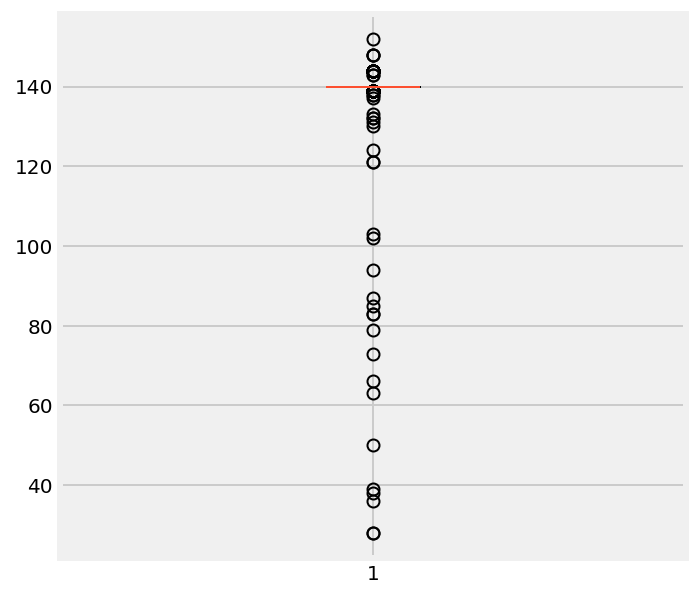

In [121]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(tweets_en.pre_clean_len)
plt.show()

In [122]:
tweets_en[tweets_en.pre_clean_len > 140].head(10)

,index,text,country,sentiment,pre_clean_len
0,248,RT @LLRobertson75: This is happening in Massac...,USA,-2.0,144
18,2896,RT @FLOTUS: As the weekend approaches I ask th...,USA,0.0,144
22,4026,RT @VanHipp: Made in America &amp; funded by U...,USA,2.0,152
23,4145,RT @BitarReal: ENJOY George Clooney's Master P...,USA,-2.0,144
62,19184,RT @CDCgov: Thank you to all the healthcare he...,USA,5.0,144
76,29208,"RT @WHO: It’s #WorldHealthDay!\n \nToday, we c...",USA,9.0,148
79,29768,RT @DanCrenshawTX: Denial? From the man who re...,USA,-2.0,144
93,40633,RT @JoeSeales: Michigan Democrat state rep dia...,USA,0.0,144
100,42617,RT @CDCgov: Thank you to all the healthcare he...,USA,5.0,144
115,46108,RT @VABVOX: Nearly 400k have #COVID19 &amp; ov...,USA,-3.0,148


In [123]:
#tweets_en = tweets_en.reset_index()
tweets_en.text[79]

'RT @DanCrenshawTX: Denial? From the man who restricted travel in January &amp; saved lives, while your party celebrated his impeachment?\n\nYou m…'

In [124]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(tweets_en.text[79], 'lxml')
print (example1.get_text)

<bound method Tag.get_text of <html><body><p>RT @DanCrenshawTX: Denial? From the man who restricted travel in January &amp; saved lives, while your party celebrated his impeachment?

You m…</p></body></html>>


In [125]:
tweets_en.text[22]


'RT @VanHipp: Made in America &amp; funded by U.S. Army, Air Force &amp; Special Forces. Approved in EU &amp; being used to treat #CytokineStorm in #COV…'

In [126]:
import re
re.sub(r'@[A-Za-z0-9]+','',tweets_en.text[22])


'RT : Made in America &amp; funded by U.S. Army, Air Force &amp; Special Forces. Approved in EU &amp; being used to treat #CytokineStorm in #COV…'

In [127]:
tweets_en.text[0]

'RT @LLRobertson75: This is happening in Massachusetts,  Los Angeles &amp; NYC... afraid it’s happening to all the states. #Masks4All #FEMA #Tru…'

In [128]:
re.sub('https?://[A-Za-z0-9./]+','',tweets_en.text[0])

'RT @LLRobertson75: This is happening in Massachusetts,  Los Angeles &amp; NYC... afraid it’s happening to all the states. #Masks4All #FEMA #Tru…'

In [129]:
tweets_en.text[78]

'RT @US_FDA: "On Friday, we stood up a formal convalescent plasma program. We have a great deal of enthusiasm for that. There are some repor…'

In [130]:
testing = tweets_en.text[78]#.decode("utf-8-sig")
testing

'RT @US_FDA: "On Friday, we stood up a formal convalescent plasma program. We have a great deal of enthusiasm for that. There are some repor…'

In [131]:
testing.replace(u"\ufffd", "?")

'RT @US_FDA: "On Friday, we stood up a formal convalescent plasma program. We have a great deal of enthusiasm for that. There are some repor…'

In [132]:
tweets_en.text[68]

'RT @RedPillMaC: In India if you disobey the #COVID19 locked down , you get spanked by police 😂😂🤣. https://t.co/K3ltXJsHIG'

In [133]:
re.sub("[^a-zA-Z]", " ", tweets_en.text[68])

'RT  RedPillMaC  In India if you disobey the  COVID   locked down   you get spanked by police      https   t co K ltXJsHIG'

In [134]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = tweets_en.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result


['rt this is happening in massachusetts los angeles nyc afraid it s happening to all the states masks all fema tru',
 'rt physicians around the country are banned from seeing non essential patients surgeons cannot perform elective surgery t',
 'rt hero down hudson co doc corrections cpl bernard waddell dies from coronavirus follow',
 'rt look out bill mitchell',
 'rt parts of florida including miami are becoming a major epicenter of covid spread with cases doubling every to',
 'rt as a former health insurance exec i don t think any story better illustrates my old industry s racket than the one i m',
 'rt not all patients who need medical attention are covid patients while we are focused sol',
 'rt see below an evolving community wide resource document that is updated continuously and share your covid and disabilit',
 'rt new video from the coronavirus frontlines nyc health and safety officials assess impact nypd officer there is a lo',
 'rt enough is enough of health encounters are non

In [135]:
nums = len(tweets_en) #this is how many tweets we recovered from the file
print ("Cleaning and parsing the tweets...\n")

clean_tweet_texts = []
y=0
for i in range(0,nums,1):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d to %d has been processed" % ( 1, i+1 ))
    clean_tweet_texts.append(tweet_cleaner(tweets_en['text'][i]))
    if (i > 10000 )and(i+10000 > nums ) and (y == 0):
        print ("Tweets %d to %d has been processed" % ( i, nums ))
        y += 1

print(clean_tweet_texts)


Cleaning and parsing the tweets...

['rt this is happening in massachusetts los angeles nyc afraid it s happening to all the states masks all fema tru', 'rt physicians around the country are banned from seeing non essential patients surgeons cannot perform elective surgery t', 'rt hero down hudson co doc corrections cpl bernard waddell dies from coronavirus follow', 'rt look out bill mitchell', 'rt parts of florida including miami are becoming a major epicenter of covid spread with cases doubling every to', 'rt as a former health insurance exec i don t think any story better illustrates my old industry s racket than the one i m', 'rt not all patients who need medical attention are covid patients while we are focused sol', 'rt see below an evolving community wide resource document that is updated continuously and share your covid and disabilit', 'rt new video from the coronavirus frontlines nyc health and safety officials assess impact nypd officer there is a lo', 'rt enough is enough o

### Clean data converted to a dataframe

In [137]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = tweets_en.sentiment
clean_df.head()

,text,target
0,rt this is happening in massachusetts los ange...,-2.0
1,rt physicians around the country are banned fr...,-2.0
2,rt hero down hudson co doc corrections cpl ber...,2.0
3,rt look out bill mitchell,0.0
4,rt parts of florida including miami are becomi...,0.0


### datacleaning function. 

The order of the cleaning is

1. Souping
2. url address('www.'pattern) removing
3. lower-case
4. negation handling
5. removing numbers and special characters
6. tokenizing and joining

In [138]:
#import pandas as pd  
#import numpy as np
#import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#import re
#from bs4 import BeautifulSoup
#from nltk.tokenize import WordPunctTokenizer
#tok = WordPunctTokenizer()

#pat1 = r'@[A-Za-z0-9_]+'
#pat2 = r'https?://[^ ]+'
#combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not","covid positive":"covid+"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [139]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    268 non-null    object 
 1   target  268 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [140]:
clean_df[clean_df.isnull().any(axis=1)].head()

,text,target


In [141]:
np.sum(clean_df.isnull().any(axis=1))

0

In [142]:
clean_df.isnull().any(axis=0)

text      False
target    False
dtype: bool

In [143]:
clean_df.dropna(inplace=True)
clean_df.reset_index(drop=True,inplace=True)

clean_df.head()


,text,target
0,rt this is happening in massachusetts los ange...,-2.0
1,rt physicians around the country are banned fr...,-2.0
2,rt hero down hudson co doc corrections cpl ber...,2.0
3,rt look out bill mitchell,0.0
4,rt parts of florida including miami are becomi...,0.0


### Word Clouds

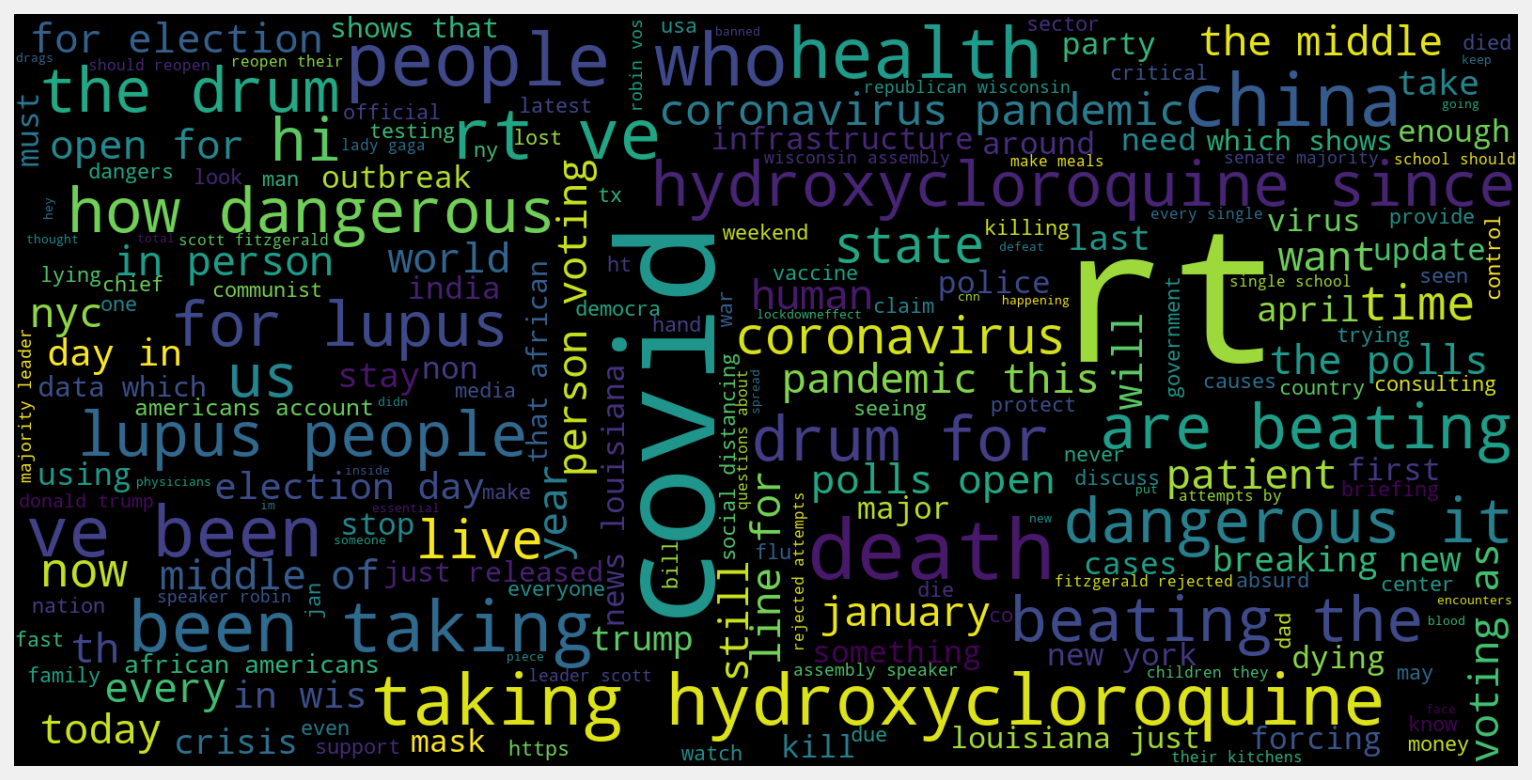

In [144]:
neg_tweets = clean_df[clean_df.target <= 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [145]:
for t in neg_tweets.text[:len(neg_tweets)]:
    if 'love' in t:
        print (t)

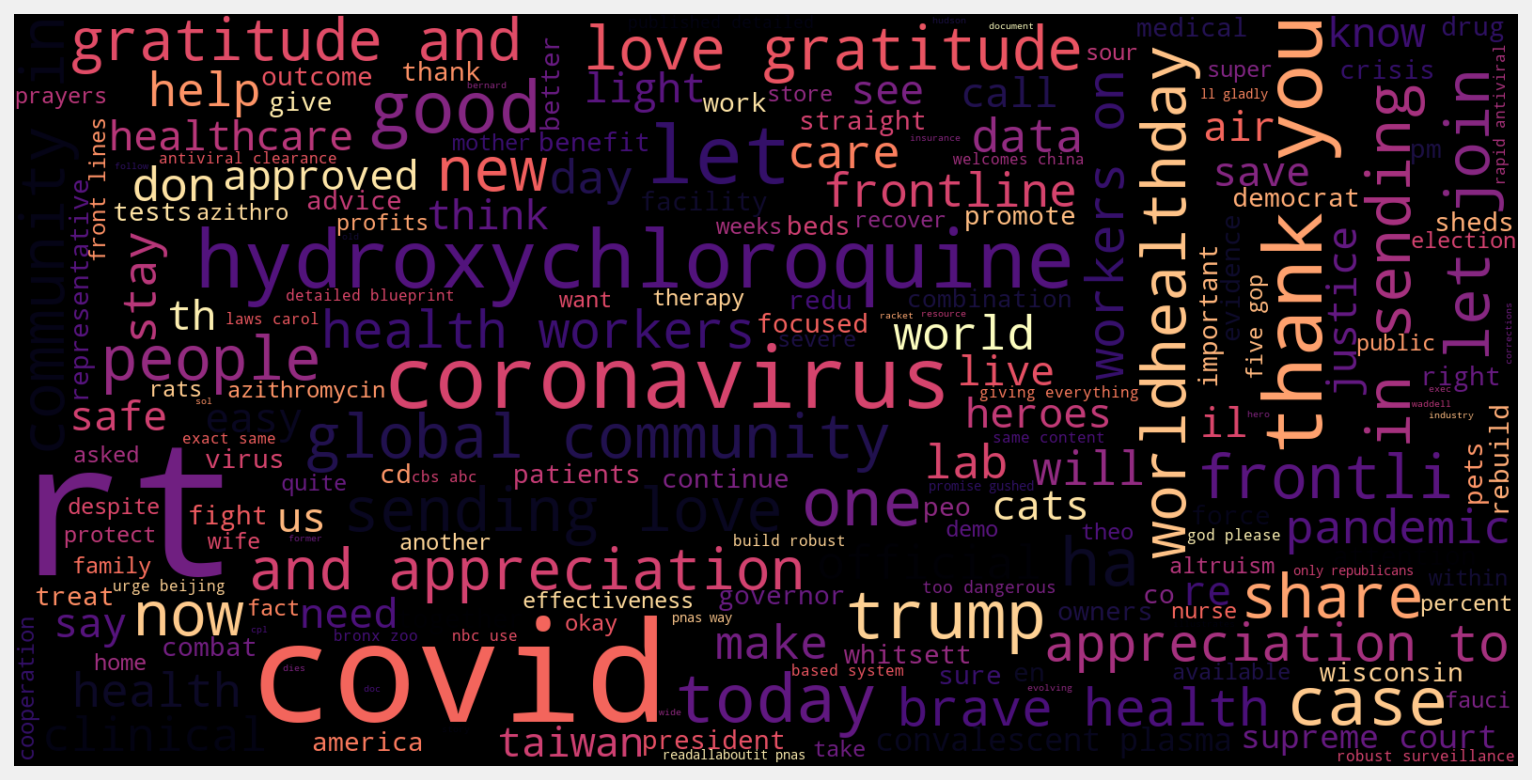

In [146]:
pos_tweets = clean_df[clean_df.target >= 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

### Preparion for data visualisation

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(clean_df.text)


CountVectorizer()

In [148]:
len(cvec.get_feature_names())

1514

In [150]:
neg_doc_matrix = cvec.transform(clean_df[clean_df.target <= 0].text)
pos_doc_matrix = cvec.transform(clean_df[clean_df.target >= 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

###### Getting term frequency for each class can be obtained with the above code block

In [151]:
#clean_df = clean_df.drop(columns=['level_0', 'index'])
clean_df.head()

,text,target
0,rt this is happening in massachusetts los ange...,-2.0
1,rt physicians around the country are banned fr...,-2.0
2,rt hero down hudson co doc corrections cpl ber...,2.0
3,rt look out bill mitchell,0.0
4,rt parts of florida including miami are becomi...,0.0


In [164]:
document_matrix = cvec.transform(clean_df.text)


#test_df = test_df.sort_values(by='target', ascending=True)

#clean_df.head()

neg_df = clean_df[clean_df.target <= 0]
pos_df = clean_df[clean_df.target > 0]

neg_df.info()
pos_df.info()

neg_doc_matrix = cvec.transform(neg_df.text)
pos_doc_matrix = cvec.transform(pos_df.text)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 264
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    178 non-null    object 
 1   target  178 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 2 to 267
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    90 non-null     object 
 1   target  90 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


In [165]:
%%time
neg_batches = np.linspace(0,len(neg_df),100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(neg_doc_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

1 entries' term freuquency calculated
19 entries' term freuquency calculated
37 entries' term freuquency calculated
55 entries' term freuquency calculated
73 entries' term freuquency calculated
91 entries' term freuquency calculated
109 entries' term freuquency calculated
127 entries' term freuquency calculated
145 entries' term freuquency calculated
163 entries' term freuquency calculated
178 entries' term freuquency calculated
Wall time: 17 ms


In [166]:
%%time
pos_batches = np.linspace(0,len(pos_df),100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(pos_doc_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

0 entries' term freuquency calculated
10 entries' term freuquency calculated
19 entries' term freuquency calculated
28 entries' term freuquency calculated
37 entries' term freuquency calculated
46 entries' term freuquency calculated
55 entries' term freuquency calculated
64 entries' term freuquency calculated
73 entries' term freuquency calculated
82 entries' term freuquency calculated
90 entries' term freuquency calculated
Wall time: 14 ms


In [167]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1
aba,0,1
abc,0,2
abortion,0,1
about,9,1
absence,0,1


In [168]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
the,189,88,277
rt,180,90,270
to,77,52,129
covid,75,44,119
of,69,32,101
for,74,27,101
and,42,40,82
in,47,32,79
is,55,17,72
are,51,14,65


In [169]:
len(term_freq_df)

1514

Text(0.5, 1.0, 'Top 200 tokens in tweets')

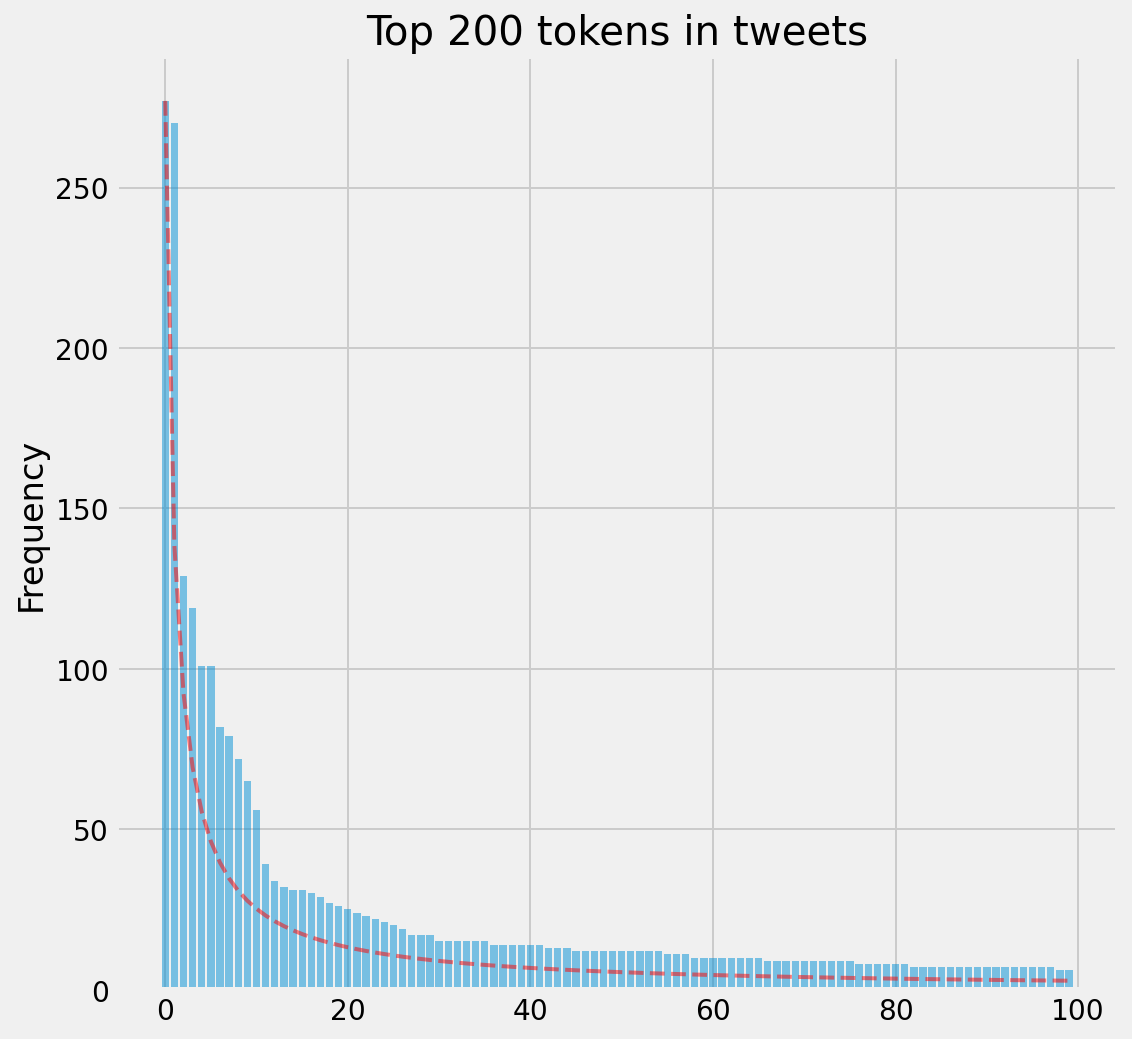

In [178]:
y_pos = np.arange(100)
plt.figure(figsize=(8,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:100], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 200 tokens in tweets')

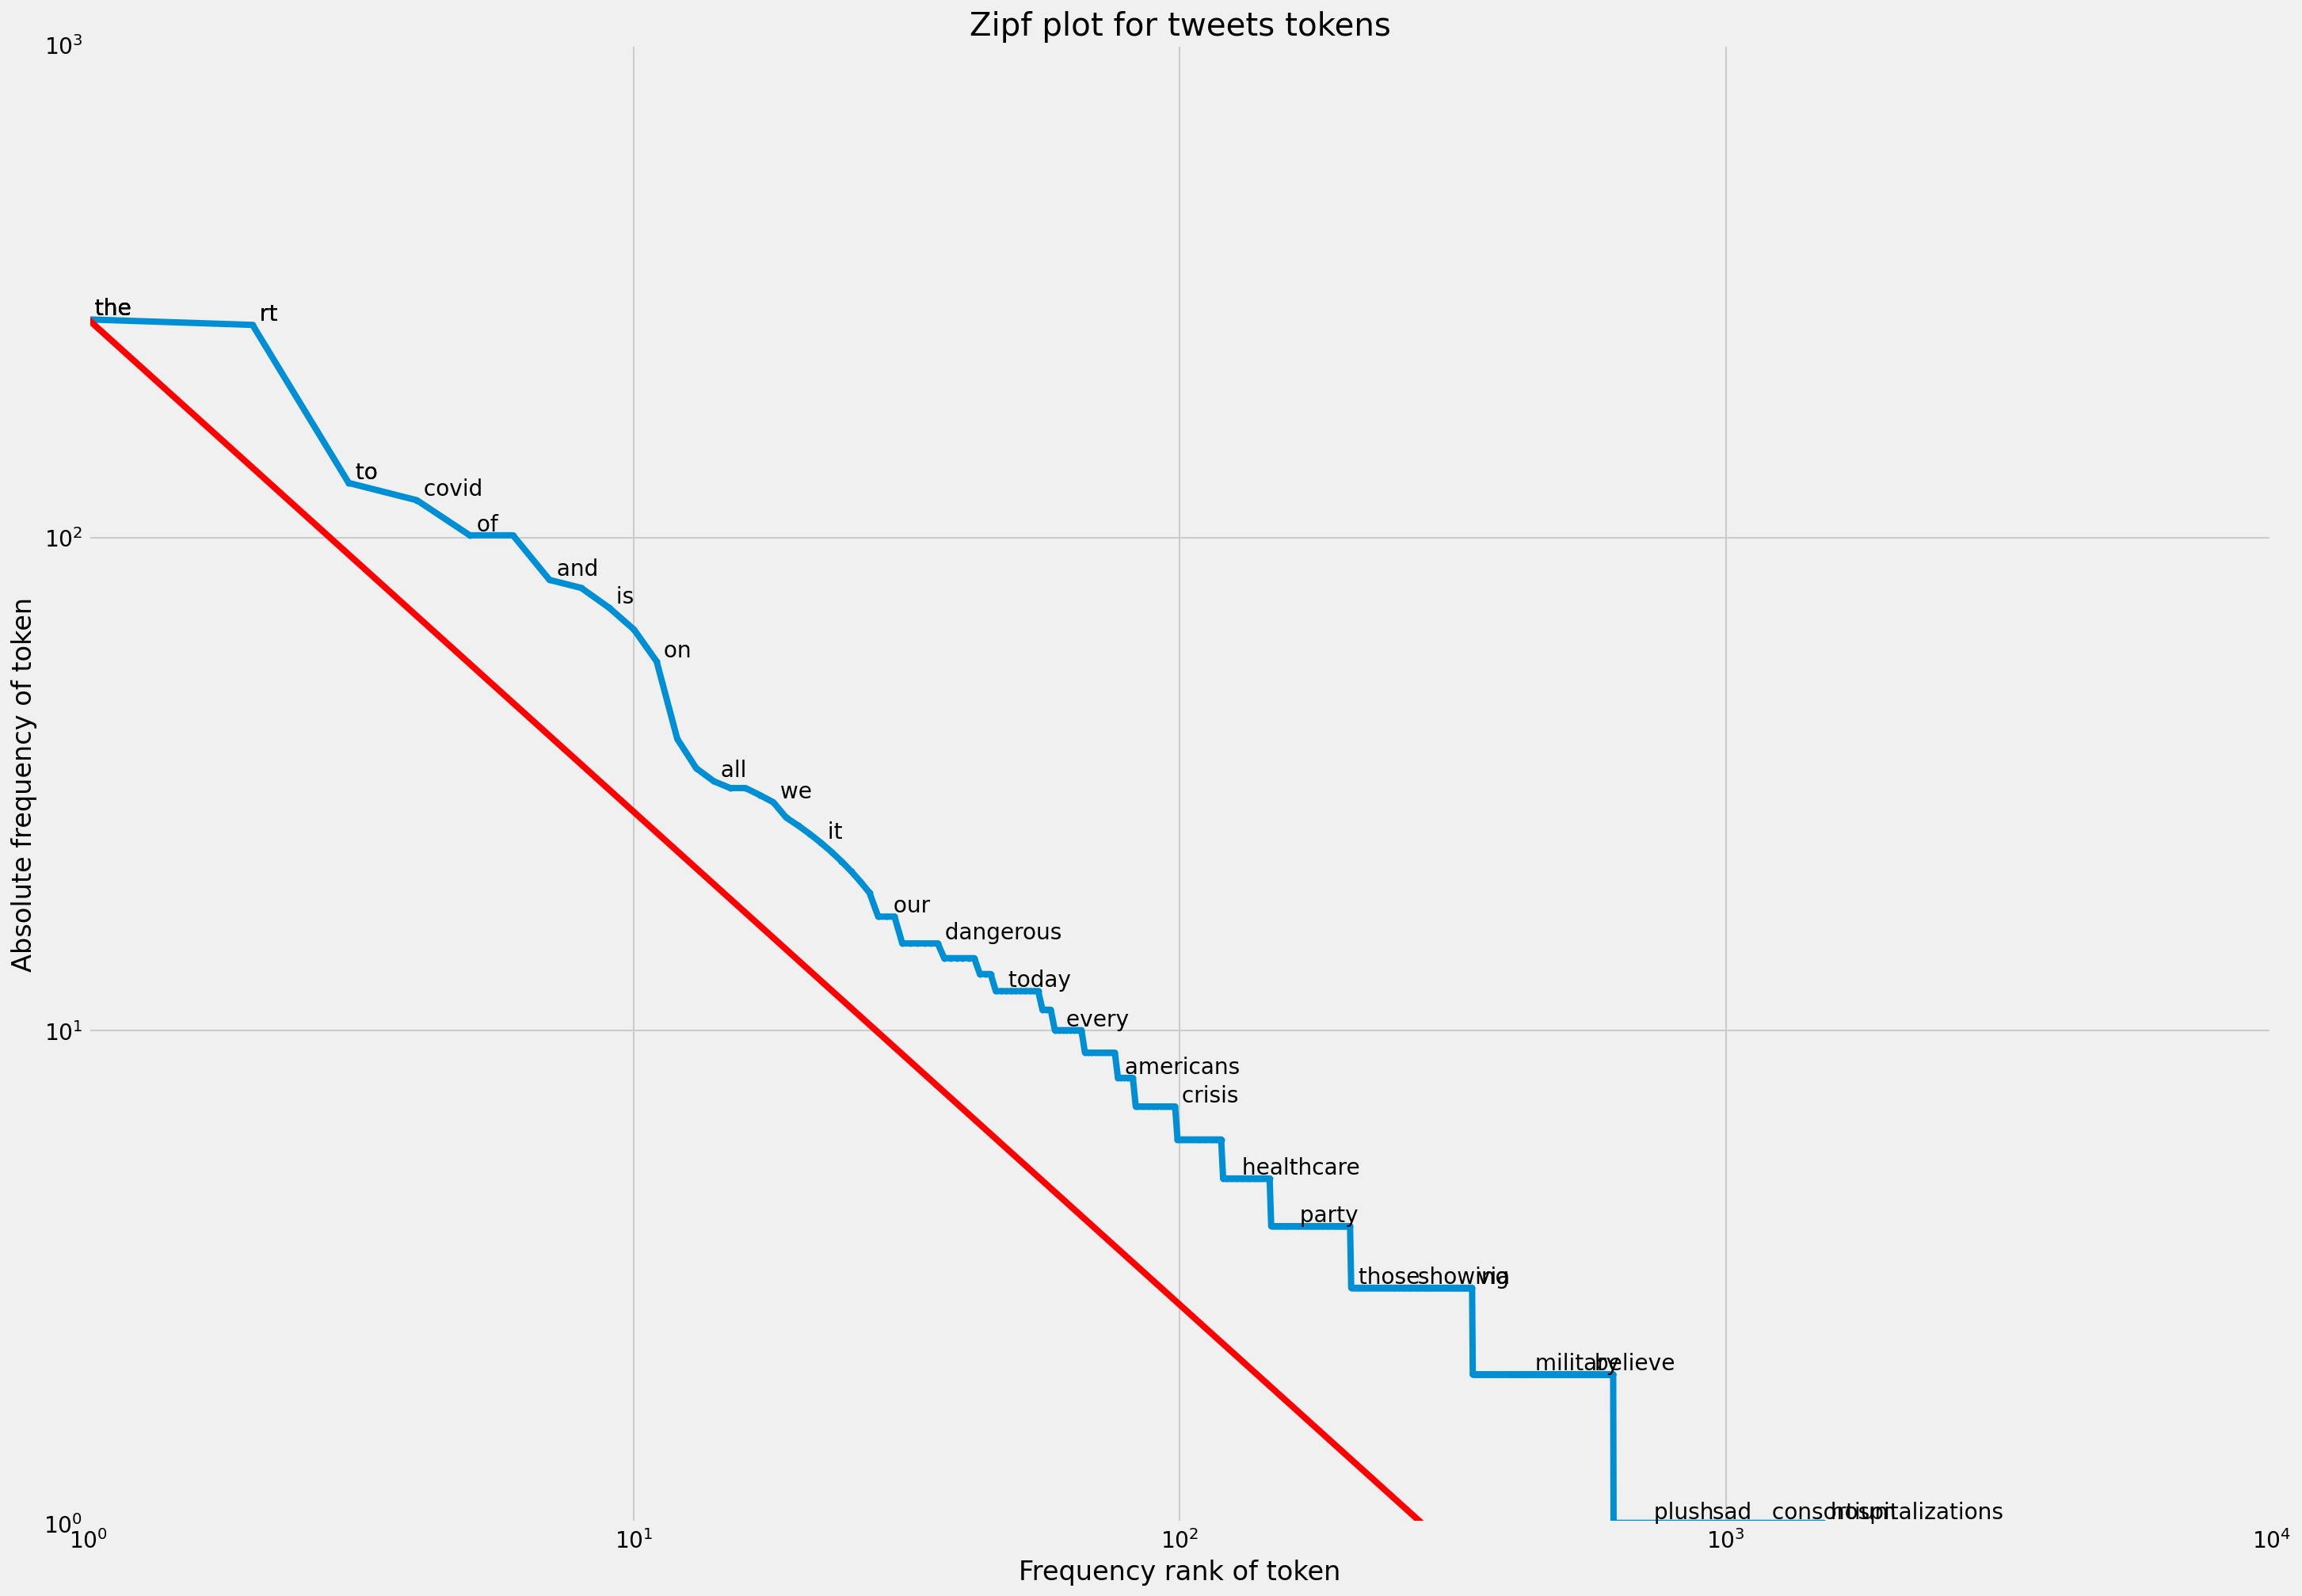

In [193]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(22,16))
plt.ylim(1,10**3)
plt.xlim(1,10**4)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 35).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

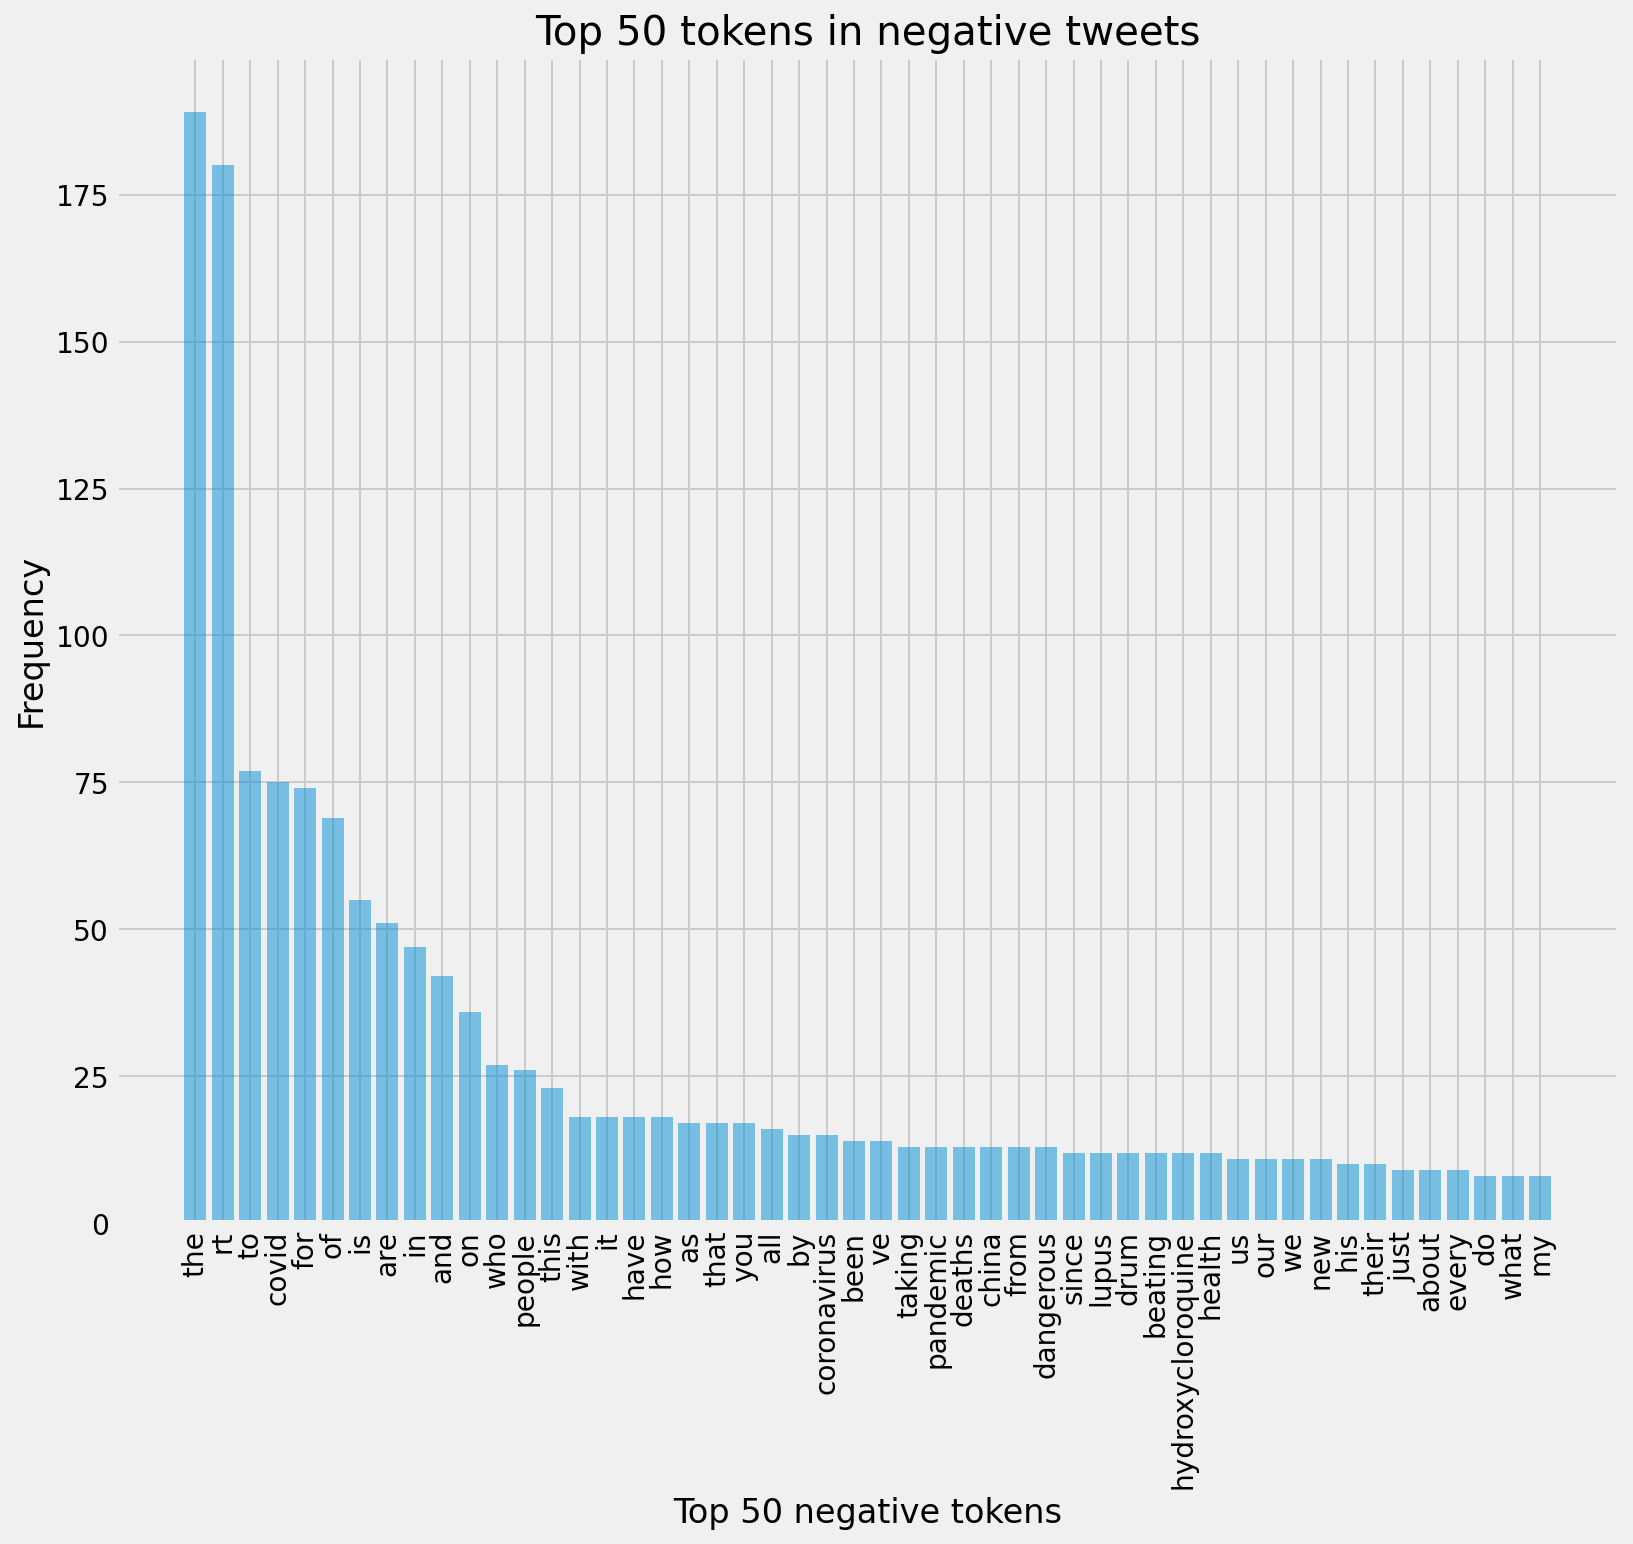

In [194]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

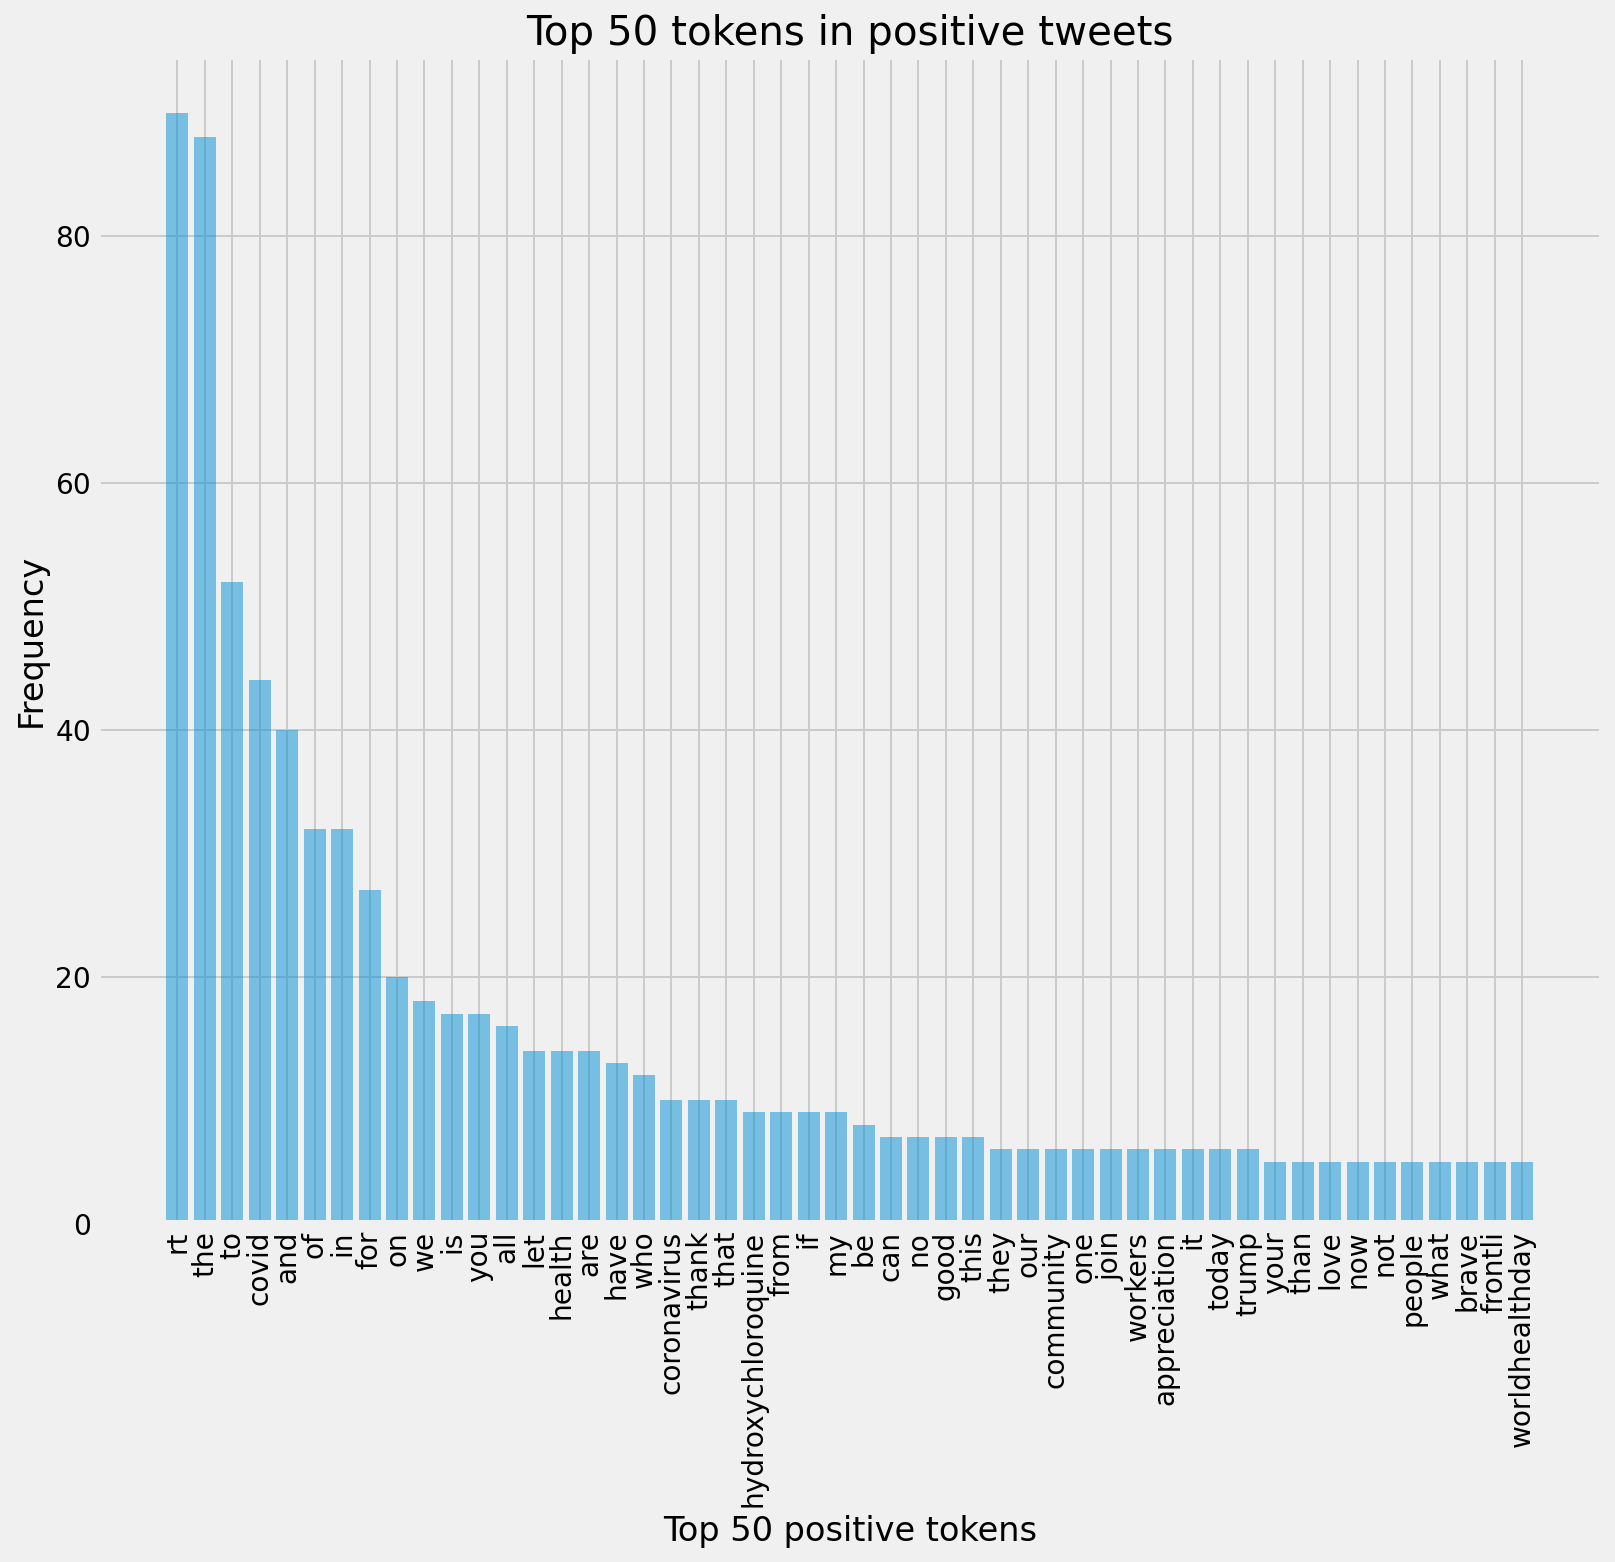

In [195]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

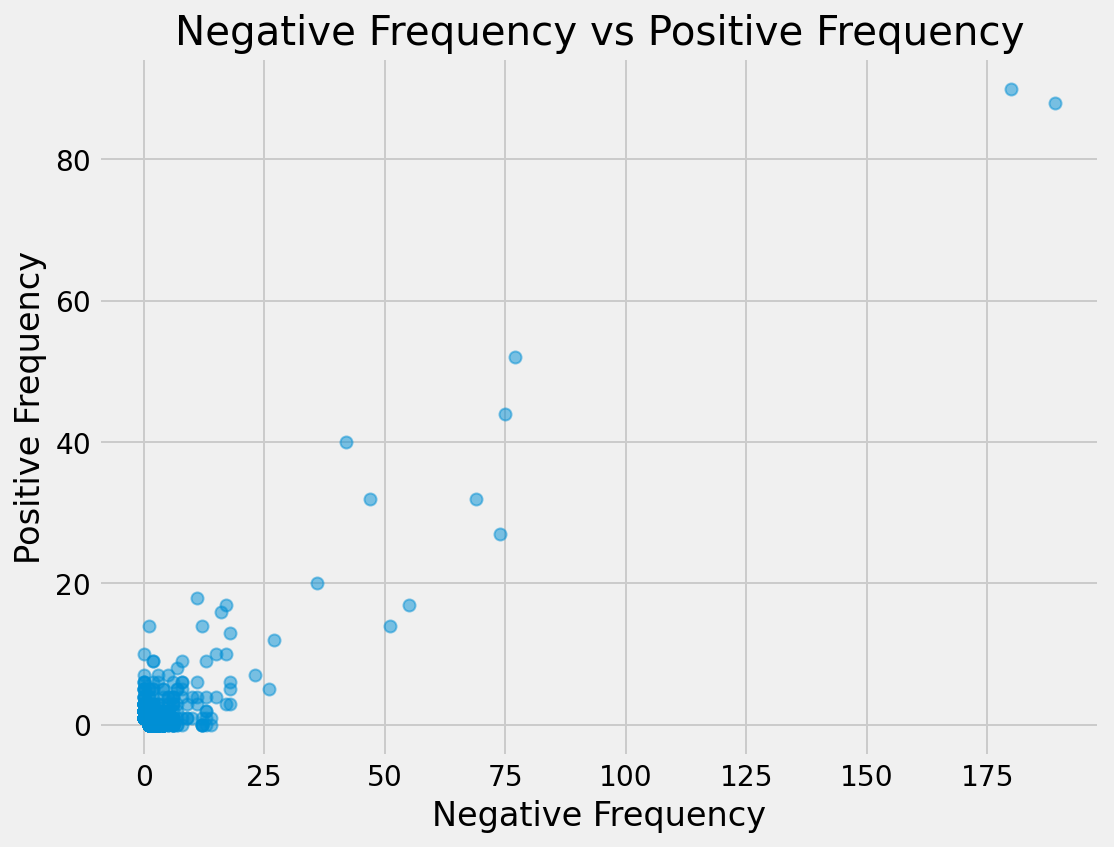

In [196]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [197]:
term_freq_df['pos_rate'] = term_freq_df['positive'] * 1./term_freq_df['total']
term_freq_df.sort_values(by='pos_rate', ascending=False).iloc[:10]


,negative,positive,total,pos_rate
aba,0,1,1,1.0
justices,0,2,2,1.0
kazakhstani,0,1,1,1.0
known,0,1,1,1.0
knows,0,1,1,1.0
kxl,0,1,1,1.0
lab,0,3,3,1.0
labs,0,1,1,1.0
large,0,1,1,1.0
laws,0,2,2,1.0


In [198]:
term_freq_df['pos_freq_pct'] = term_freq_df['positive'] * 1./term_freq_df['positive'].sum()
term_freq_df.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
rt,180,90,270,0.333333,0.052570
the,189,88,277,0.317690,0.051402
to,77,52,129,0.403101,0.030374
covid,75,44,119,0.369748,0.025701
and,42,40,82,0.487805,0.023364
of,69,32,101,0.316832,0.018692
in,47,32,79,0.405063,0.018692
for,74,27,101,0.267327,0.015771
on,36,20,56,0.357143,0.011682
we,11,18,29,0.620690,0.010514


In [199]:
from scipy.stats import hmean
term_freq_df['pos_hmean'] = term_freq_df.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])                                                               if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)
                                                       
term_freq_df.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
rt,180,90,270,0.333333,0.052570,0.090817
the,189,88,277,0.317690,0.051402,0.088487
to,77,52,129,0.403101,0.030374,0.056491
covid,75,44,119,0.369748,0.025701,0.048061
and,42,40,82,0.487805,0.023364,0.044593
in,47,32,79,0.405063,0.018692,0.035734
of,69,32,101,0.316832,0.018692,0.035301
for,74,27,101,0.267327,0.015771,0.029785
on,36,20,56,0.357143,0.011682,0.022624
we,11,18,29,0.620690,0.010514,0.020678


In [200]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df['pos_rate_normcdf'] = normcdf(term_freq_df['pos_rate'])
term_freq_df['pos_freq_pct_normcdf'] = normcdf(term_freq_df['pos_freq_pct'])
term_freq_df['pos_normcdf_hmean'] = hmean([term_freq_df['pos_rate_normcdf'], term_freq_df['pos_freq_pct_normcdf']])
term_freq_df.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
thank,0,10,10,1.000000,0.005841,0.011614,0.926980,0.979188,0.952369
let,1,14,15,0.933333,0.008178,0.016213,0.903590,0.998442,0.948651
good,0,7,7,1.000000,0.004089,0.008144,0.926980,0.911196,0.919020
if,2,9,11,0.818182,0.005257,0.010447,0.851017,0.964662,0.904283
hydroxychloroquine,2,9,11,0.818182,0.005257,0.010447,0.851017,0.964662,0.904283
appreciation,0,6,6,1.000000,0.003505,0.006985,0.926980,0.868314,0.896689
join,0,6,6,1.000000,0.003505,0.006985,0.926980,0.868314,0.896689
workers,0,6,6,1.000000,0.003505,0.006985,0.926980,0.868314,0.896689
love,0,5,5,1.000000,0.002921,0.005824,0.926980,0.812933,0.866219
sending,0,5,5,1.000000,0.002921,0.005824,0.926980,0.812933,0.866219


In [201]:
term_freq_df['neg_rate'] = term_freq_df['negative'] * 1./term_freq_df['total']
term_freq_df['neg_freq_pct'] = term_freq_df['negative'] * 1./term_freq_df['negative'].sum()
term_freq_df['neg_hmean'] = term_freq_df.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])                                                                if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0                                                                else 0), axis=1)
                                                       
term_freq_df['neg_rate_normcdf'] = normcdf(term_freq_df['neg_rate'])
term_freq_df['neg_freq_pct_normcdf'] = normcdf(term_freq_df['neg_freq_pct'])
term_freq_df['neg_normcdf_hmean'] = hmean([term_freq_df['neg_rate_normcdf'], term_freq_df['neg_freq_pct_normcdf']])
term_freq_df.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
ve,14,0,14,0.000000,0.000000,0.000000,0.206945,0.397533,0.272193,1.000000,0.004403,0.008766,0.793055,0.921581,0.852501
taking,13,0,13,0.000000,0.000000,0.000000,0.206945,0.397533,0.272193,1.000000,0.004088,0.008143,0.793055,0.902652,0.844312
since,12,0,12,0.000000,0.000000,0.000000,0.206945,0.397533,0.272193,1.000000,0.003774,0.007519,0.793055,0.880568,0.834524
hydroxycloroquine,12,0,12,0.000000,0.000000,0.000000,0.206945,0.397533,0.272193,1.000000,0.003774,0.007519,0.793055,0.880568,0.834524
beating,12,0,12,0.000000,0.000000,0.000000,0.206945,0.397533,0.272193,1.000000,0.003774,0.007519,0.793055,0.880568,0.834524
drum,12,0,12,0.000000,0.000000,0.000000,0.206945,0.397533,0.272193,1.000000,0.003774,0.007519,0.793055,0.880568,0.834524
been,14,1,15,0.066667,0.000584,0.001158,0.252806,0.488018,0.333072,0.933333,0.004403,0.008764,0.747194,0.921581,0.825276
deaths,13,1,14,0.071429,0.000584,0.001159,0.256275,0.488018,0.336069,0.928571,0.004088,0.008140,0.743725,0.902652,0.815518
how,18,3,21,0.142857,0.001752,0.003462,0.311121,0.666169,0.424150,0.857143,0.005660,0.011246,0.688879,0.970734,0.805873
people,26,5,31,0.161290,0.002921,0.005737,0.326060,0.812933,0.465437,0.838710,0.008176,0.016194,0.673940,0.997769,0.804490


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

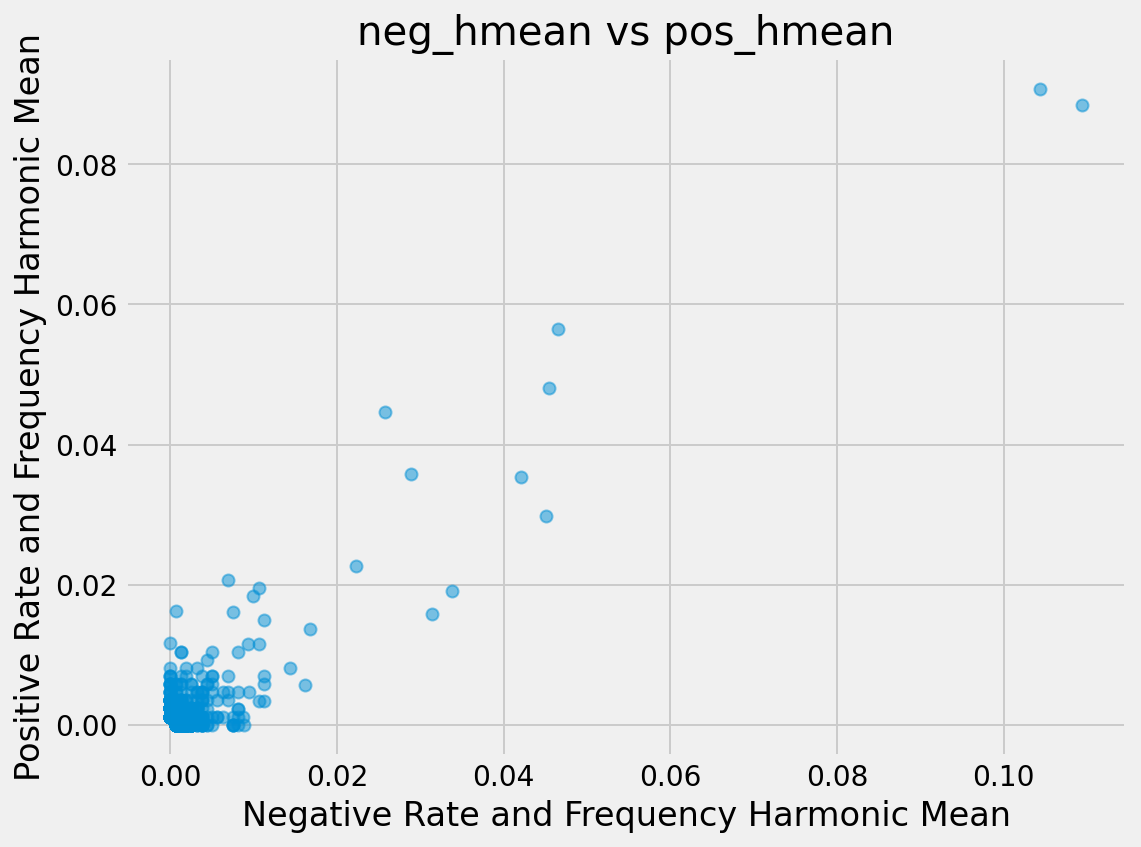

In [202]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

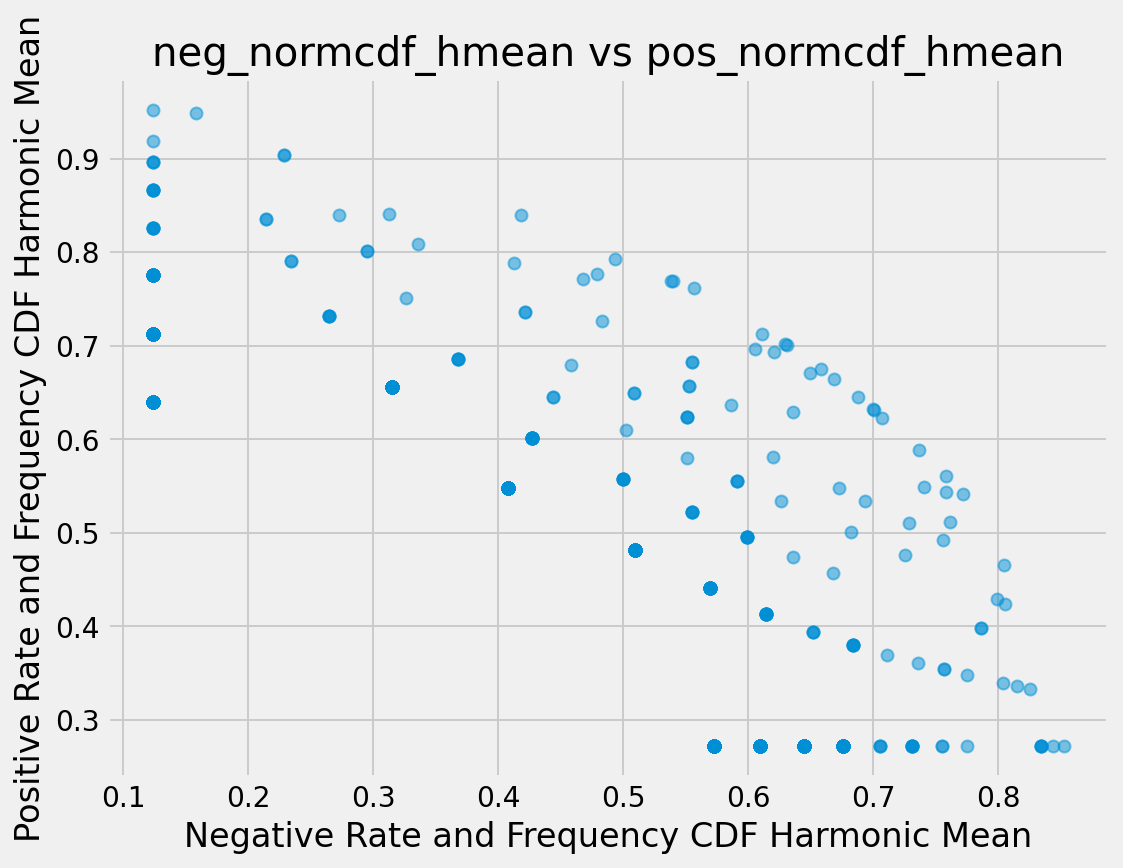

In [203]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [204]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df.pos_normcdf_hmean), high=max(term_freq_df.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

In [212]:
x = clean_df.text
y = clean_df.target
from sklearn.model_selection import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.4, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.4, random_state=SEED)
print ("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train), (len(x_train[y_train <= 0]) / (len(x_train)*1.))*100, (len(x_train[y_train >= 1]) / (len(x_train)*1.))*100))
print ("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation), (len(x_validation[y_validation <= 0]) / (len(x_validation)*1.))*100, (len(x_validation[y_validation >= 1]) / (len(x_validation)*1.))*100))
print ("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test), (len(x_test[y_test <= 0]) / (len(x_test)*1.))*100, (len(x_test[y_test >= 1]) / (len(x_test)*1.))*100))

Train set has total 160 entries with 68.12% negative, 31.87% positive
Validation set has total 64 entries with 65.62% negative, 34.38% positive
Test set has total 44 entries with 61.36% negative, 38.64% positive


### BASELINE

When comparing various machine learning algorithms, baseline provides a point of reference to compare. The most popular baseline is the Zero Rule (ZeroR). ZeroR classifier simply predicts the majority category (class). Although there is no predictability power in ZeroR, it is useful for determining a baseline performance as a benchmark for other classification methods. As you can see from the above validation set class division, the majority class is negative with 50.40%, which means if a classifier predicts negative for every validation data, it will get 50.40% accuracy.

Another baseline I wanted to compare the validation results with is TextBlob. Textblob is a python library for processing textual data. Apart from other useful tools such as POS tagging, n-gram, The package has built-in sentiment classification. This is a so-called out-of-the-box sentiment analysis tool, and in addition to the null accuracy, I will also keep in mind of the accuracy I get from TextBlob sentiment analysis to see how my model is performing.

In [213]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [214]:
%time
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

Wall time: 0 ns


In [215]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])
print ("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print ("-"*80)
print ("Confusion Matrix\n")
print (confusion)
print ("-"*80)
print ("Classification Report\n")
print (classification_report(y_validation, tbpred))

Accuracy Score: 10.94%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                   3                   0
negative                  13                   4
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

        -8.0       0.00      0.00      0.00         1
        -7.0       0.00      0.00      0.00         1
        -5.0       0.00      0.00      0.00         1
        -4.0       0.00      0.00      0.00         1
        -3.0       0.00      0.00      0.00         9
        -2.0       0.00      0.00      0.00         7
        -1.0       0.00      0.00      0.00         5
         0.0       0.25      0.24      0.24        17
         1.0       0.06      1.00      0.12         3
         2.0       0.00      0.00      0.00        10
         3.0       0.00      0.0

c:\users\nupur\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TextBlob sentiment analysis yielded 10.94%% accuracy on the validation set, null accuracy is better (65.25%, for negative class ).

### feature extraction

If we want to use text in machine learning algorithms, we’ll have to convert them to a numerical representation. One of the methods is called bag-of-words approach. The bag of words model ignores grammar and order of words. Once we have a corpus (text data) then first, a list of vocabulary is created based on the entire corpus. Then each document or data entry is represented as numerical vectors based on the vocabulary built from the corpus.

#### Count Vectorizer

A model I chose to evaluate different count vectors is the logistic regression. It is one of the linear models, so computationally scalable to big data, compared to models like KNN or random forest. And once I have the optimal number of features and make a decision on whether to remove stop words or not, then I will try different models with the chosen number of vocabularies' count vectors.

In [217]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

Below I define two functions to iteratively train on a different number of features, then check the accuracy of logistic regression on the validation set.

In [235]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test <= 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test <= 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time


In [244]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(1000,10001,1000)
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

csv = 'term_freq_df.csv'
term_freq_df = pd.read_csv(csv,index_col=0)
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

#### Unigram

In [245]:
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')


RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression()


Validation result for 1000 features
null accuracy: 34.38%
accuracy score: 39.06%
model is 4.69% more accurate than null accuracy
train and test time: 0.23s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 34.38%
accuracy score: 39.06%
model is 4.69% more accurate than null accuracy
train and test time: 0.23s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 34.38%
accuracy score: 39.06%
model is 4.69% more accurate than null accuracy
train and test time: 0.22s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.38%
accuracy score: 39.06%
model is 4.69% more accurate than null accuracy
train and test time: 0.20s
-----------------------------------------------------------------------

In [246]:
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()


RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression()


Validation result for 1000 features
null accuracy: 34.38%
accuracy score: 39.06%
model is 4.69% more accurate than null accuracy
train and test time: 0.32s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 34.38%
accuracy score: 40.62%
model is 6.25% more accurate than null accuracy
train and test time: 0.33s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 34.38%
accuracy score: 40.62%
model is 6.25% more accurate than null accuracy
train and test time: 0.35s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.38%
accuracy score: 40.62%
model is 6.25% more accurate than null accuracy
train and test time: 0.34s
--------------------------------------------------------------------------

In [263]:
term_freq_df.sort_values(by='total', ascending=False).iloc[:15]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
the,189,88,277,0.317690,0.051402,0.088487,0.461888,1.000000,0.631906,0.682310,0.059434,0.109343,0.538112,1.000000,0.699705
rt,180,90,270,0.333333,0.052570,0.090817,0.476016,1.000000,0.645001,0.666667,0.056604,0.104348,0.523984,1.000000,0.687651
to,77,52,129,0.403101,0.030374,0.056491,0.539140,1.000000,0.700573,0.596899,0.024214,0.046540,0.460860,1.000000,0.630944
covid,75,44,119,0.369748,0.025701,0.048061,0.508988,1.000000,0.674608,0.630252,0.023585,0.045468,0.491012,1.000000,0.658629
of,69,32,101,0.316832,0.018692,0.035301,0.461114,1.000000,0.631182,0.683168,0.021698,0.042060,0.538886,1.000000,0.700358
for,74,27,101,0.267327,0.015771,0.029785,0.416818,1.000000,0.588386,0.732673,0.023270,0.045108,0.583182,1.000000,0.736721
and,42,40,82,0.487805,0.023364,0.044593,0.614324,1.000000,0.761091,0.512195,0.013208,0.025751,0.385676,0.999999,0.556661
in,47,32,79,0.405063,0.018692,0.035734,0.540909,1.000000,0.702065,0.594937,0.014780,0.028843,0.459091,1.000000,0.629284
is,55,17,72,0.236111,0.009930,0.019058,0.389385,0.999866,0.560493,0.763889,0.017296,0.033825,0.610615,1.000000,0.758238
are,51,14,65,0.215385,0.008178,0.015757,0.371461,0.998442,0.541472,0.784615,0.016038,0.031433,0.628539,1.000000,0.771905


In [264]:
from sklearn.feature_extraction import text
a = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:15].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

False

In [265]:
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))

In [268]:
print ("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 15 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 15 frequent words)

LogisticRegression()


Validation result for 1000 features
null accuracy: 34.38%
accuracy score: 42.19%
model is 7.81% more accurate than null accuracy
train and test time: 0.18s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 34.38%
accuracy score: 42.19%
model is 7.81% more accurate than null accuracy
train and test time: 0.18s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 34.38%
accuracy score: 42.19%
model is 7.81% more accurate than null accuracy
train and test time: 0.17s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.38%
accuracy score: 42.19%
model is 7.81% more accurate than null accuracy
train and test time: 0.18s
----------------------------------------

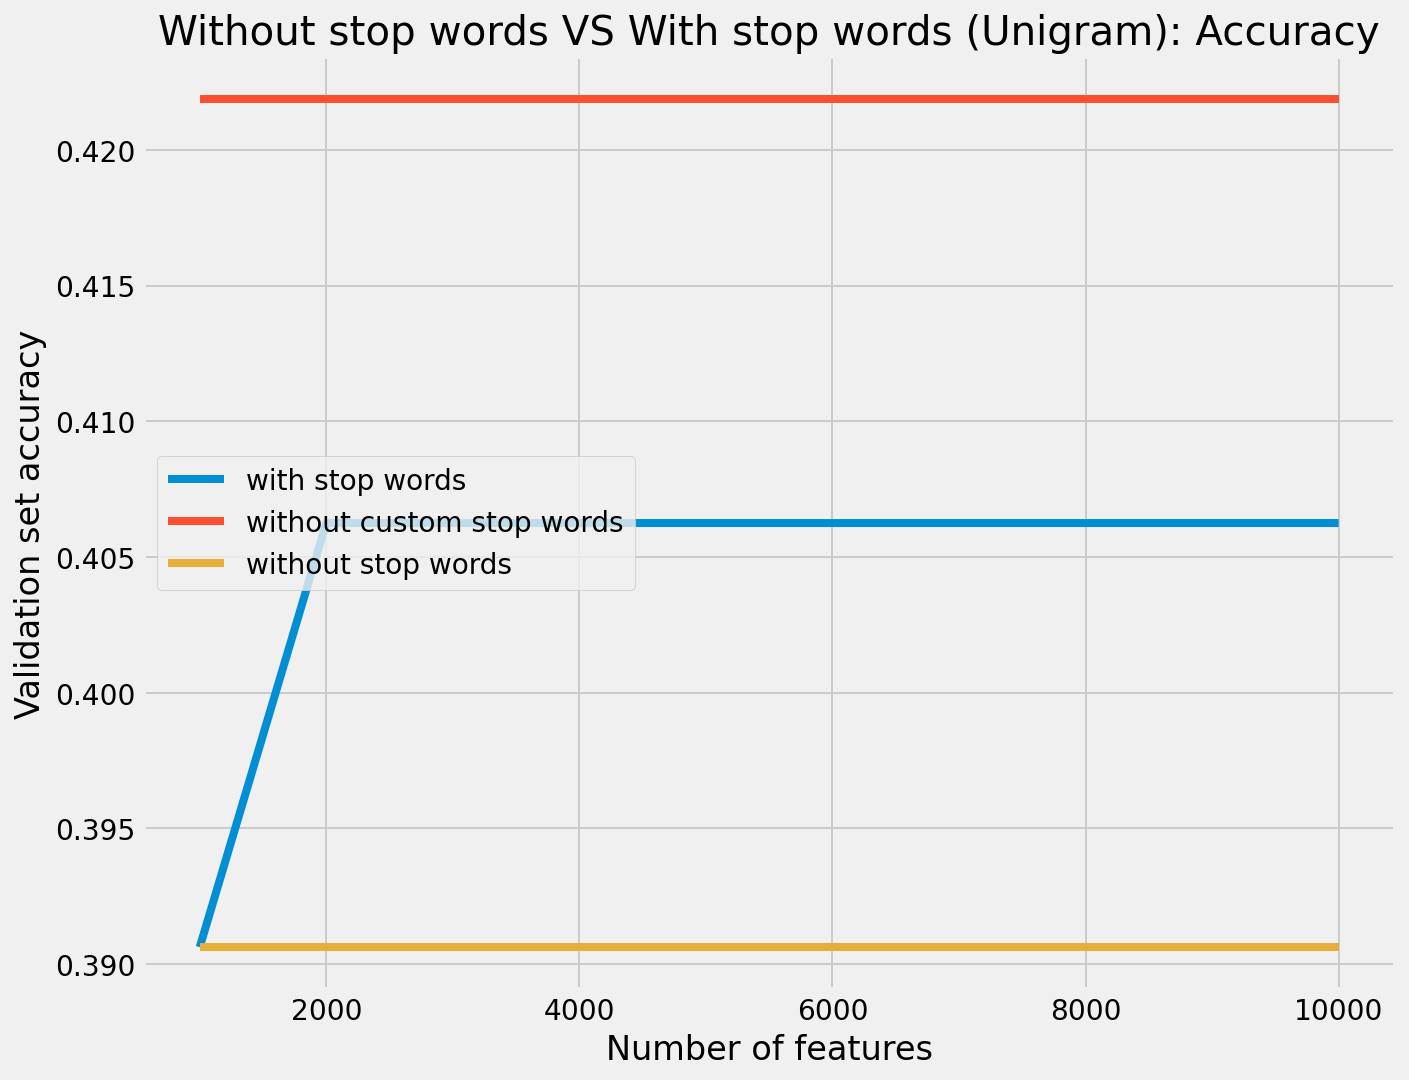

In [269]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(10,8))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

### bigram and Trigram

In [272]:
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2),stop_words=my_stop_words)
print ("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3),stop_words=my_stop_words)

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression()


Validation result for 1000 features
null accuracy: 34.38%
accuracy score: 45.31%
model is 10.94% more accurate than null accuracy
train and test time: 0.21s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 34.38%
accuracy score: 42.19%
model is 7.81% more accurate than null accuracy
train and test time: 0.28s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 34.38%
accuracy score: 42.19%
model is 7.81% more accurate than null accuracy
train and test time: 0.35s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.38%
accuracy score: 42.19%
model is 7.81% more accurate than null accuracy
train and test time: 0.31s
--------------------------------------------------------------------------

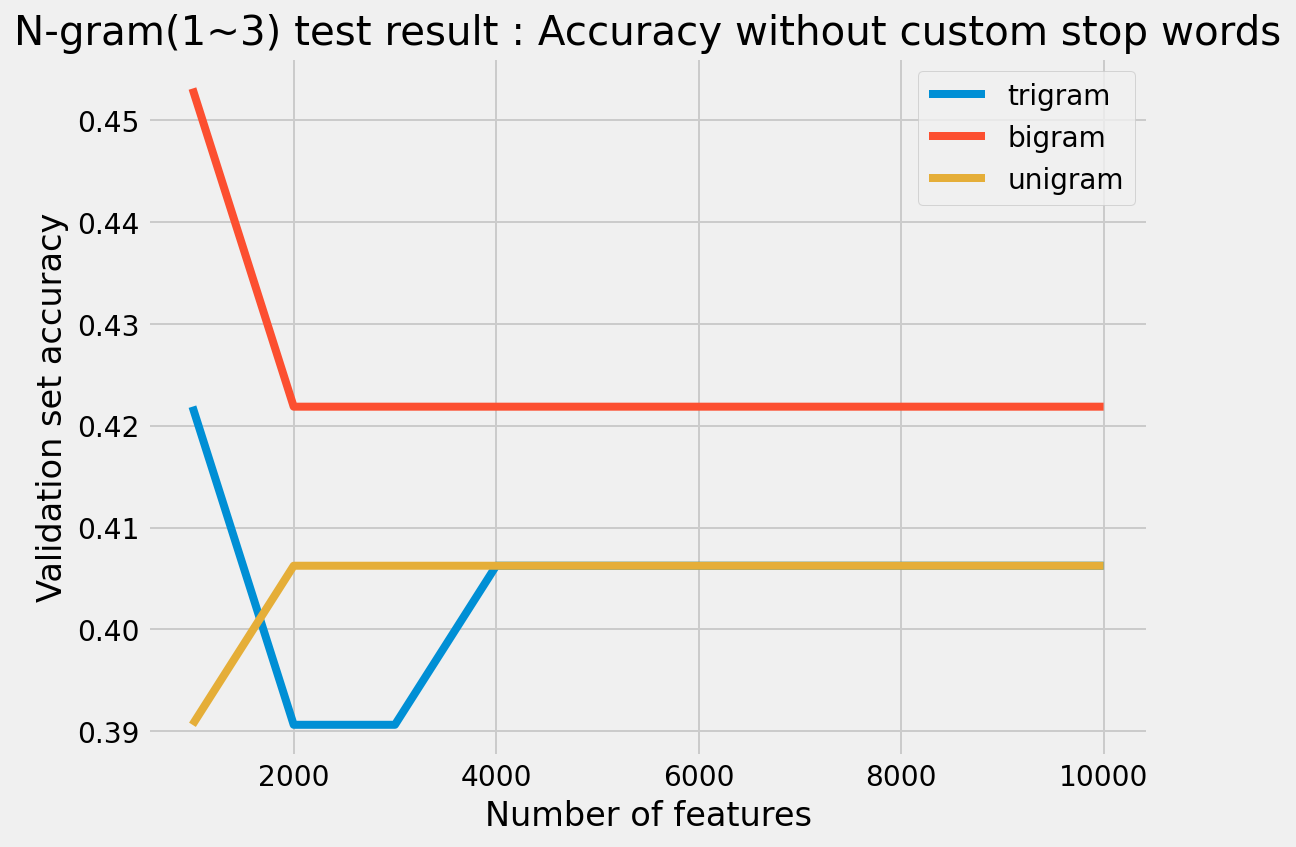

In [273]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy without custom stop words")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [274]:
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))
print ("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression()


Validation result for 1000 features
null accuracy: 34.38%
accuracy score: 43.75%
model is 9.38% more accurate than null accuracy
train and test time: 0.39s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 34.38%
accuracy score: 43.75%
model is 9.38% more accurate than null accuracy
train and test time: 0.48s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 34.38%
accuracy score: 45.31%
model is 10.94% more accurate than null accuracy
train and test time: 0.56s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.38%
accuracy score: 45.31%
model is 10.94% more accurate than null accuracy
train and test time: 0.60s
-------------------------------------------------------------------------

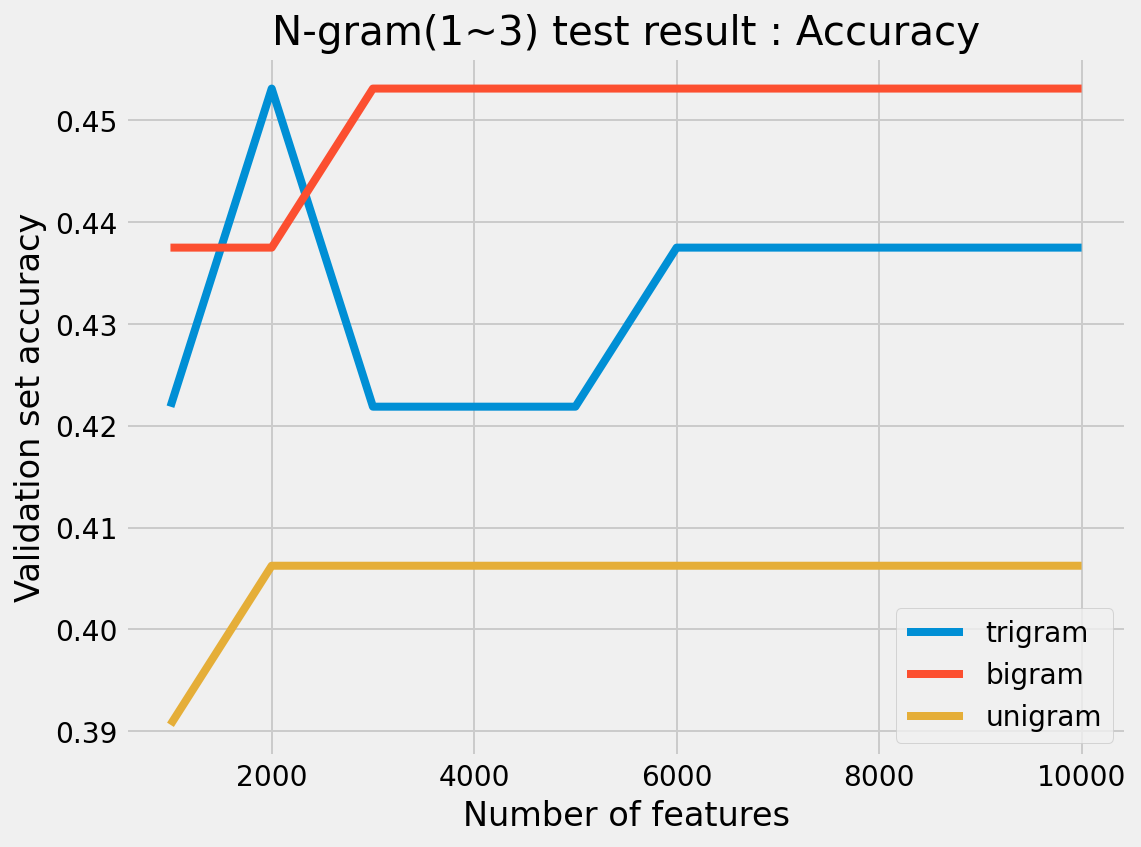

In [276]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

Below I defined another function to take a closer look at best performing number of features with each n-gram. Below function not only reports accuracy but also gives confusion matrix and classification report.

In [277]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("-"*80)
    print ("Confusion Matrix\n")
    print (confusion)
    print ("-"*80)
    print ("Classification Report\n")
    print (classification_report(y_test, y_pred, target_names=['negative', 'positive']))

In [279]:
%%time
tg_cvec = CountVectorizer(max_features=10000,ngram_range=(1, 3))
tg_pipeline = Pipeline([
        ('vectorizer', tg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(tg_pipeline, x_train, y_train, x_validation, y_validation)

null accuracy: 73.44%
accuracy score: 43.75%
model is 29.69% less accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                  17                   0
positive                   3                   0
--------------------------------------------------------------------------------
Classification Report



ValueError: Number of classes, 13, does not match size of target_names, 2. Try specifying the labels parameter

In [102]:
y_test

142    0.0
173   -3.0
108   -4.0
105    8.0
255    1.0
Name: target, dtype: float64

In [ ]:
Tfidf Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
import numpy as np

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))


nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [ ]:
Algorithms Comparison

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print "Validation result for {}".format(n)
        print c
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Normally, a lexical approach will take many other aspects into the calculation to refine the prediction result, but I will try a very simple model.

In [ ]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print "Validation result for {}".format(label)
    print clf
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(max_features=10000)
cvec.fit(x_train)

neg_train = x_train[y_train == 0]
pos_train = x_train[y_train == 1]
neg_doc_matrix = cvec.transform(neg_train)
pos_doc_matrix = cvec.transform(pos_train)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

from scipy.stats import hmean
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]


Tfidf Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print "null accuracy: {0:.2f}%".format(null_accuracy*100)
    print "accuracy score: {0:.2f}%".format(accuracy*100)
    if accuracy > null_accuracy:
        print "model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100)
    elif accuracy == null_accuracy:
        print "model has the same accuracy with the null accuracy"
    else:
        print "model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100)
    print "train and test time: {0:.2f}s".format(train_test_time)
    print "-"*80
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print "\n"
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print "Validation result for {} features".format(n)
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))


nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

Algorithms Comparison

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print "Validation result for {}".format(n)
        print c
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

And the result for the ensemble classifier, which takes votes from the top 5 model from the above result (linear regression, linear SVC, multinomial NB, ridge classifier, passive-aggressive classifier) is as below

In [ ]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print "Validation result for {}".format(label)
    print clf
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)


Lexical Approach

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(max_features=10000)
cvec.fit(x_train)

neg_train = x_train[y_train == 0]
pos_train = x_train[y_train == 1]
neg_doc_matrix = cvec.transform(neg_train)
pos_doc_matrix = cvec.transform(pos_train)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

from scipy.stats import hmean
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]


Normally, a lexical approach will take many other aspects into the calculation to refine the prediction result, but I will try a very simple model.

In [ ]:
pos_hmean = term_freq_df2.pos_normcdf_hmean

y_val_predicted_proba = []
for t in x_validation:
    hmean_scores = [pos_hmean[w] for w in t.split() if w in pos_hmean.index]
    if len(hmean_scores) > 0:
        prob_score = np.mean(hmean_scores)
    else:
        prob_score = np.random.random()
    y_val_predicted_proba.append(prob_score)
    
pred = [1 if t > 0.56 else 0 for t in y_val_predicted_proba]

from sklearn.metrics import accuracy_score
accuracy_score(y_validation,pred)

As a preparation, in addition to loading the needed dependencies, we also need to labelise each tweet with unique IDs using Gensim’s LabeledSentence function.

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils

def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result
  
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

DBOW (Distributed Bag Of Words)

In [ ]:
from sklearn.linear_model import LogisticRegression

cores = multiprocessing.cpu_count()
model_ug_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha
    
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs
  
train_vecs_dbow = get_vectors(model_ug_dbow, x_train, 100)
validation_vecs_dbow = get_vectors(model_ug_dbow, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dbow, y_train)
clf.score(validation_vecs_dbow, y_validation)

DMC (Distributed Memory Concatenation)

In [ ]:
cores = multiprocessing.cpu_count()
model_ug_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmc.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmc.alpha -= 0.002
    model_ug_dmc.min_alpha = model_ug_dmc.alpha
   
train_vecs_dmc = get_vectors(model_ug_dmc, x_train, 100)
validation_vecs_dmc = get_vectors(model_ug_dmc, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmc, y_train)
clf.score(validation_vecs_dmc, y_validation)

DMM (Distributed Memory Mean)

In [ ]:
cores = multiprocessing.cpu_count()
model_ug_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmm.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmm.alpha -= 0.002
    model_ug_dmm.min_alpha = model_ug_dmm.alpha
    
train_vecs_dmm = get_vectors(model_ug_dmm, x_train, 100)
validation_vecs_dmm = get_vectors(model_ug_dmm, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmm, y_train)
clf.score(validation_vecs_dmm, y_validation)

Combined Model

In [ ]:
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

train_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_train, 200)
validation_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_validation, 200)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmc, y_train)
clf.score(validation_vecs_dbow_dmc, y_validation)

Let’s try another combination.

In [ ]:
train_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_train, 200)
validation_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_validation, 200)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm, y_train)
clf.score(validation_vecs_dbow_dmm, y_validation)

Phrase Modelling

In [ ]:
from gensim.models.phrases import Phrases, Phraser

tokenized_train = [t.split() for t in x_train]
phrases = Phrases(tokenized_train)
bigram = Phraser(phrases)

In [ ]:
def labelize_tweets_bg(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(bigram[t.split()], [prefix + '_%s' % i]))
    return result
  
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v_bg = labelize_tweets_bg(all_x, 'all')

DBOW (Distributed Bag Of Words) with bigram detected

In [ ]:
cores = multiprocessing.cpu_count()
model_bg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dbow.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dbow.alpha -= 0.002
    model_bg_dbow.min_alpha = model_bg_dbow.alpha
    
train_vecs_dbow_bg = get_vectors(model_bg_dbow, x_train, 100)
validation_vecs_dbow_bg = get_vectors(model_bg_dbow, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_bg, y_train)
clf.score(validation_vecs_dbow_bg, y_validation)

DMC (Distributed Memory Concatenated) with bigram detected

In [ ]:
cores = multiprocessing.cpu_count()
model_bg_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmc.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmc.alpha -= 0.002
    model_bg_dmc.min_alpha = model_bg_dmc.alpha
    
train_vecs_dmc_bg = get_vectors(model_bg_dmc, x_train, 100)
validation_vecs_dmc_bg = get_vectors(model_bg_dmc, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmc_bg, y_train)
clf.score(validation_vecs_dmc_bg, y_validation)

DMM (Distributed Memory Mean) with bigram detected

In [ ]:
cores = multiprocessing.cpu_count()
model_bg_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmm.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmm.alpha -= 0.002
    model_bg_dmm.min_alpha = model_bg_dms.alpha
    
train_vecs_dmm_bg = get_vectors(model_bg_dmm, x_train, 100)
validation_vecs_dmm_bg = get_vectors(model_bg_dmm, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmm_bg, y_train)
clf.score(validation_vecs_dmm_bg, y_validation)

Combined models (code of combined model, but we need to run the model with the new DMM and DMC)

In [ ]:
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

train_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_train, 200)
validation_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_validation, 200)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmc, y_train)
clf.score(validation_vecs_dbow_dmc, y_validation)

Trigram

In [ ]:
tg_phrases = Phrases(bigram[tokenized_train])
trigram = Phraser(tg_phrases)

DMC (Distributed Memory Concatenated) with bigram detected

In [ ]:
cores = multiprocessing.cpu_count()
model_bg_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmc.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmc.alpha -= 0.002
    model_bg_dmc.min_alpha = model_bg_dmc.alpha
    
train_vecs_dmc_bg = get_vectors(model_bg_dmc, x_train, 100)
validation_vecs_dmc_bg = get_vectors(model_bg_dmc, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmc_bg, y_train)
clf.score(validation_vecs_dmc_bg, y_validation)

DMM (Distributed Memory Mean) with bigram detected

In [ ]:
cores = multiprocessing.cpu_count()
model_bg_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmm.build_vocab([x for x in tqdm(all_x_w2v_bg)])

for epoch in range(30):
    model_bg_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmm.alpha -= 0.002
    model_bg_dmm.min_alpha = model_bg_dms.alpha
    
train_vecs_dmm_bg = get_vectors(model_bg_dmm, x_train, 100)
validation_vecs_dmm_bg = get_vectors(model_bg_dmm, x_validation, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dmm_bg, y_train)
clf.score(validation_vecs_dmm_bg, y_validation)

Combined models (code of combined model, but we need to run the model with the new DMM and DMC)

In [ ]:
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

train_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_train, 200)
validation_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_validation, 200)

clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmc, y_train)
clf.score(validation_vecs_dbow_dmc, y_validation)

Chi2 Feature Selection

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
x_train_tfidf = tvec.fit_transform(x_train)
x_validation_tfidf = tvec.transform(x_validation)
chi2score = chi2(x_train_tfidf, y_train)[0]

plt.figure(figsize=(15,10))
wscores = zip(tvec.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = zip(*wchi2[-20:])
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
ch2_result = []
for n in np.arange(10000,100000,10000):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train)
    x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
    clf = LogisticRegression()
    clf.fit(x_train_chi2_selected, y_train)
    score = clf.score(x_validation_chi2_selected, y_validation)
    ch2_result.append(score)
    print "chi2 feature selection evaluation calculated for {} features".format(n)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(np.arange(10000,100000,10000), ch2_result,label='tfidf dimesions reduced from 100,000 features',linestyle=':', color='orangered')

plt.title("tfidft vectorizer: features limited within tfidft vectorizer VS reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

Principal Component Analysis (PCA)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
d2v_ugdbow_tgdmm_std = scaler.fit_transform(train_vecs_ugdbow_tgdmm)
d2v_ugdbow_tgdmm_std_val = scaler.fit_transform(validation_vecs_ugdbow_tgdmm)
d2v_pca = PCA().fit(d2v_ugdbow_tgdmm_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, d2v_pca.n_components_+1)
ax.plot(x_values, d2v_pca.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(d2v_pca.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('Doc2vec (unigram DBOW + trigram DMM) : explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

Artificial Neural Network

ANN with Tfidf vectorizer

In [ ]:
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0
            
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=100000))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=5, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(x_train_tfidf)
x_train_tfidf_norm = norm.transform(x_train_tfidf)
x_validation_tfidf_norm = norm.transform(x_validation_tfidf)

Dropout

In [ ]:
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=100000))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=5, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)

Shuffling

In [ ]:
def batch_generator_shuffle(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    np.random.shuffle(index)
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            np.random.shuffle(index)
            counter=0
            
model_s = Sequential()
model_s.add(Dense(64, activation='relu', input_dim=100000))
model_s.add(Dense(1, activation='sigmoid'))
model_s.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_s.fit_generator(generator=batch_generator_shuffle(x_train_tfidf, y_train, 32),
                    epochs=5, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)

Learning Rate

In [ ]:
import keras
custom_adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model_testing_2 = Sequential()
model_testing_2.add(Dense(64, activation='relu', input_dim=100000))
model_testing_2.add(Dense(1, activation='sigmoid'))
model_testing_2.compile(optimizer=custom_adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_testing_2.fit_generator(generator=batch_generator_shuffle(x_train_tfidf, y_train, 32),
                    epochs=2, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)

Increasing Number of Nodes

In [ ]:
model_s_2 = Sequential()
model_s_2.add(Dense(128, activation='relu', input_dim=100000))
model_s_2.add(Dense(1, activation='sigmoid'))
model_s_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_s_2.fit_generator(generator=batch_generator_shuffle(x_train_tfidf, y_train, 32),
                    epochs=2, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)